In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("RTA Dataset.csv")

In [3]:
data.head(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [5]:
data.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [6]:
data.isnull().mean() 


Time                           0.000000
Day_of_week                    0.000000
Age_band_of_driver             0.000000
Sex_of_driver                  0.000000
Educational_level              0.060166
Vehicle_driver_relation        0.047012
Driving_experience             0.067311
Type_of_vehicle                0.077135
Owner_of_vehicle               0.039136
Service_year_of_vehicle        0.318935
Defect_of_vehicle              0.359451
Area_accident_occured          0.019406
Lanes_or_Medians               0.031260
Road_allignment                0.011530
Types_of_Junction              0.072020
Road_surface_type              0.013966
Road_surface_conditions        0.000000
Light_conditions               0.000000
Weather_conditions             0.000000
Type_of_collision              0.012585
Number_of_vehicles_involved    0.000000
Number_of_casualties           0.000000
Vehicle_movement               0.025008
Casualty_class                 0.000000
Sex_of_casualty                0.000000


Obs: We see that there exist missing values in the dataset. Therefore, before making a decision to impute them or drop them, we will try to understand the relationship between the missing features and the target.

In [7]:
na_features = [feature for feature in data.columns if data[feature].isnull().sum()>0]
na_features

['Educational_level',
 'Vehicle_driver_relation',
 'Driving_experience',
 'Type_of_vehicle',
 'Owner_of_vehicle',
 'Service_year_of_vehicle',
 'Defect_of_vehicle',
 'Area_accident_occured',
 'Lanes_or_Medians',
 'Road_allignment',
 'Types_of_Junction',
 'Road_surface_type',
 'Type_of_collision',
 'Vehicle_movement',
 'Work_of_casuality',
 'Fitness_of_casuality']

Let's take one feature "Education" and the target "Accident Severity"
Null Hypothesis : Accident severity is not dependent on the education level of the driver
Alternate Hypothesis : Accident severity is dependent on the education level of the driver
Since both of the cols are categorical in nature, we perform CHI-squared test.

In [8]:
from scipy.stats import chi2_contingency
cols = ['Educational_level',
 'Vehicle_driver_relation',
 'Driving_experience',
 'Type_of_vehicle',
 'Owner_of_vehicle',
 'Service_year_of_vehicle',
 'Defect_of_vehicle',
 'Area_accident_occured',
 'Lanes_or_Medians',
 'Road_allignment',
 'Types_of_Junction',
 'Road_surface_type',
 'Type_of_collision',
 'Vehicle_movement',
 'Work_of_casuality',
 'Fitness_of_casuality']

alpha = 0.05
for col in cols:
    data_cont = pd.crosstab(data[col], data["Accident_severity"])
    stat, p, dof, expected = chi2_contingency(data_cont)
    if p > alpha:
        print(f"Accept : {col}")
    else:
        print(f"Reject : {col}")
    

Accept : Educational_level


Accept : Vehicle_driver_relation
Accept : Driving_experience
Accept : Type_of_vehicle
Accept : Owner_of_vehicle
Accept : Service_year_of_vehicle
Accept : Defect_of_vehicle
Reject : Area_accident_occured
Accept : Lanes_or_Medians
Accept : Road_allignment
Reject : Types_of_Junction
Accept : Road_surface_type
Accept : Type_of_collision
Accept : Vehicle_movement
Accept : Work_of_casuality
Accept : Fitness_of_casuality


## Observation:
On performing the Chi2 test, we had to accept the null hypothesis for 14 columns since the presence of missing values in this 14 cols doesn't have much impact towards the target.
However, I chose to impute the missing values of "Area_accident_occured" and "Types_of_Junction" since they impact the target.

In [9]:
data_new=data.copy()
data_new.dropna(subset=['Educational_level',
 'Vehicle_driver_relation',
 'Driving_experience',
 'Type_of_vehicle',
 'Owner_of_vehicle',
 'Service_year_of_vehicle',
 'Defect_of_vehicle',
 'Lanes_or_Medians',
 'Road_allignment',
 'Road_surface_type',
 'Type_of_collision',
 'Vehicle_movement',
 'Work_of_casuality',
 'Fitness_of_casuality'], inplace=True)

In [10]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3172 entries, 8 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         3172 non-null   object
 1   Day_of_week                  3172 non-null   object
 2   Age_band_of_driver           3172 non-null   object
 3   Sex_of_driver                3172 non-null   object
 4   Educational_level            3172 non-null   object
 5   Vehicle_driver_relation      3172 non-null   object
 6   Driving_experience           3172 non-null   object
 7   Type_of_vehicle              3172 non-null   object
 8   Owner_of_vehicle             3172 non-null   object
 9   Service_year_of_vehicle      3172 non-null   object
 10  Defect_of_vehicle            3172 non-null   object
 11  Area_accident_occured        3135 non-null   object
 12  Lanes_or_Medians             3172 non-null   object
 13  Road_allignment              3172 non

Obs: Since, we see huge amount of data loss when we dropped the null values, we proceed on imputing them and then selecting only required features to maintain the meaning of the dataset.


In [11]:
cols = ['Educational_level',
 'Vehicle_driver_relation',
 'Driving_experience',
 'Type_of_vehicle',
 'Owner_of_vehicle',
 'Service_year_of_vehicle',
 'Defect_of_vehicle',
 'Lanes_or_Medians',
 'Road_allignment',
 'Road_surface_type',
 'Type_of_collision',
 'Vehicle_movement',
 'Work_of_casuality',
 'Fitness_of_casuality',
 "Types_of_Junction",
 "Area_accident_occured"]

for col in cols:
    # data[col] = data[col].fillna(data[col].mode())  - Doesn't work since it return series of values - In other words, ambiguity coz of multiple mode values.
    # Extracting single mode value and then imputing the columns.
    mode_value = data[col].mode()[0]
    data[col] = data[col].fillna(mode_value)


In [12]:
data.isnull().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

In [13]:
data.duplicated().sum()

0

In [14]:

for col in data.columns:
    unique_vals=data[col].unique()
    print(f"{col}:",unique_vals)

Time: ['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00']
Day_of_week: ['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
Age_band_of_driver: ['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
Sex_of_driver: ['Male' 'Female' 'Unknown']
Educational_level: ['Above high school' 'Junior high school' 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']
Vehicle_driver_relation: ['Employee' 'Unknown' 'Owner' 'Other']
Driving_experience: ['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' 'No Licence' 'Below 1yr' 'unknown']
Type_of_vehicle: ['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)'
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle']
Owner_of_vehicle: ['Owner' 'Governmental' 'Organization' 'Other']
Service_year_of_vehicle: ['Above 10yr' '5-10yrs' 'Unknown' '1-2yr' '2-5yrs' 'Below 1yr']
Defe

Obs : In type of vehicle, we see that there exist unknown or unusual type of symbols especially for Lorry and Public Transport. TO make it more redeable, changing the Public (13?45 seats) to Public (13-45 seats) and Lorry (41?100Q), Lorry (11?40Q) to Lorry (41-100Q), Lorry (11-40Q) 

In [15]:
data['Type_of_vehicle']=data["Type_of_vehicle"].str.replace("?","-")

In [16]:
data['Type_of_vehicle'].unique()

array(['Automobile', 'Public (> 45 seats)', 'Lorry (41-100Q)',
       'Public (13-45 seats)', 'Lorry (11-40Q)', 'Long lorry',
       'Public (12 seats)', 'Taxi', 'Pick up upto 10Q', 'Stationwagen',
       'Ridden horse', 'Other', 'Bajaj', 'Turbo', 'Motorcycle',
       'Special vehicle', 'Bicycle'], dtype=object)

In [17]:
# Replacing "na" with null space and then imputing them
cols = ["Casualty_class","Sex_of_casualty","Age_band_of_casualty","Casualty_severity"]
for col in cols:
    mode_val = data[col].mode()[0]
    data[col]=data[col].replace("na",mode_val)

In [18]:
#Obs : We still see the presence of "na" in Age band of Casualty column.
#Replace the na with "unknown" for EDA
data["Age_band_of_casualty"]=data["Age_band_of_casualty"].str.replace("na","unknown")


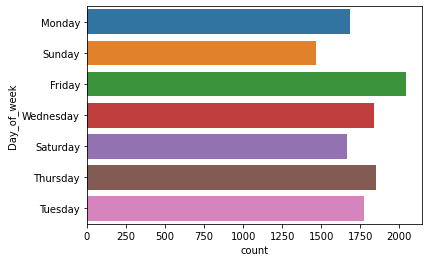

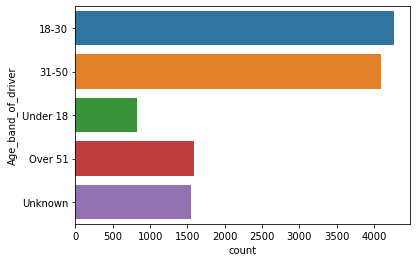

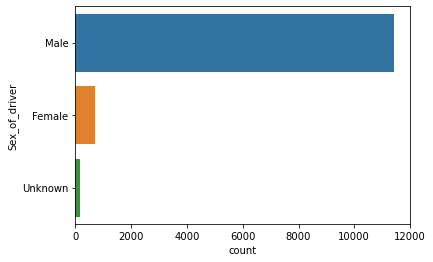

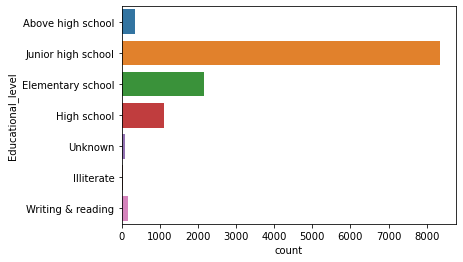

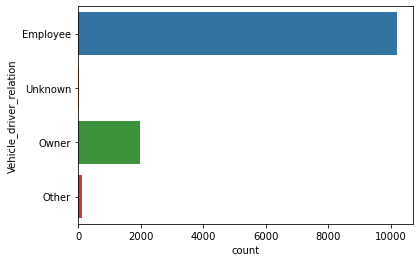

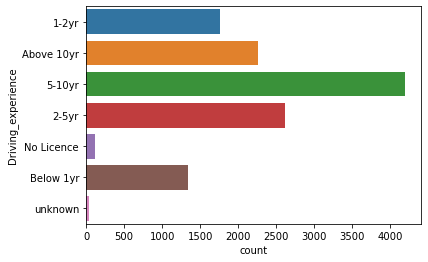

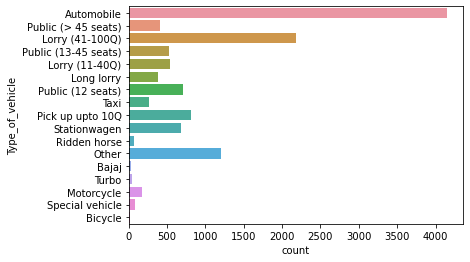

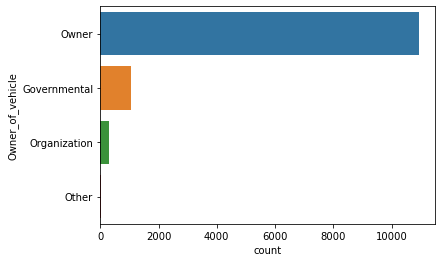

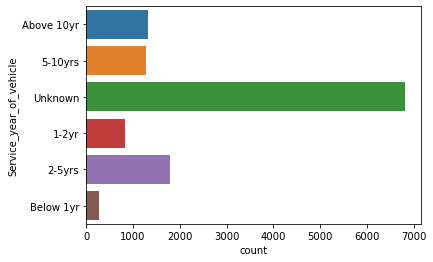

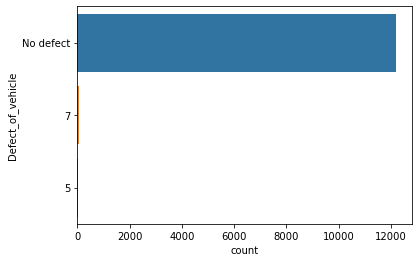

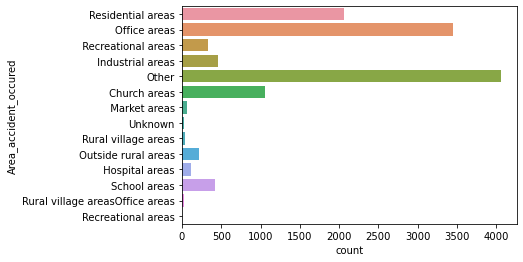

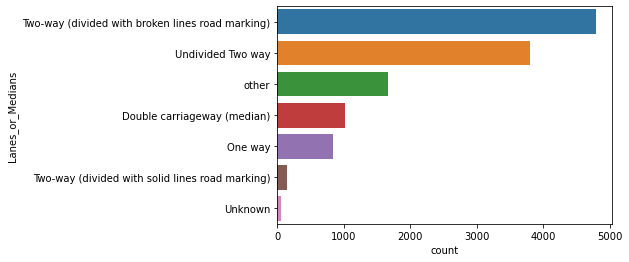

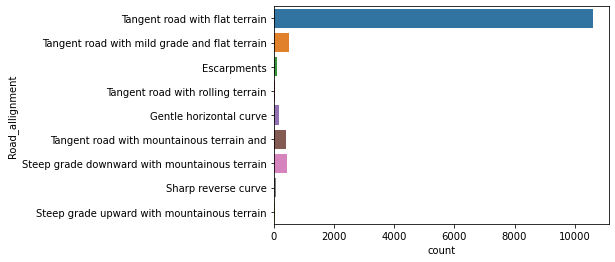

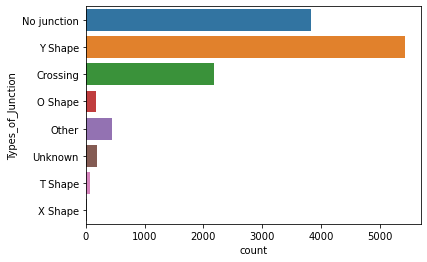

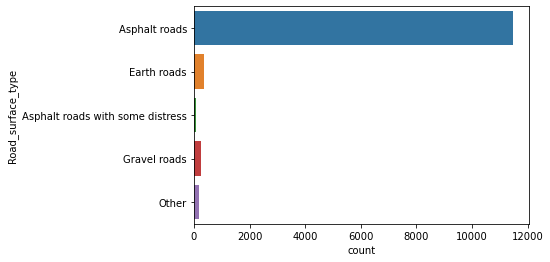

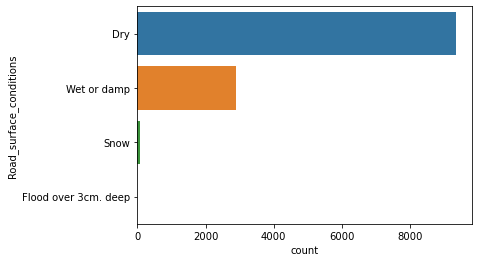

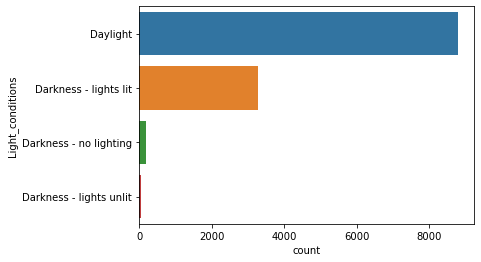

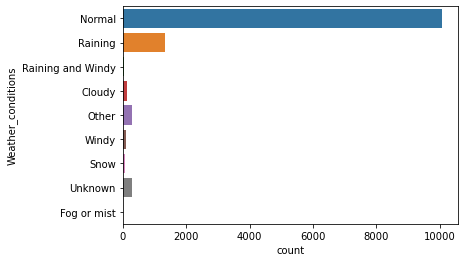

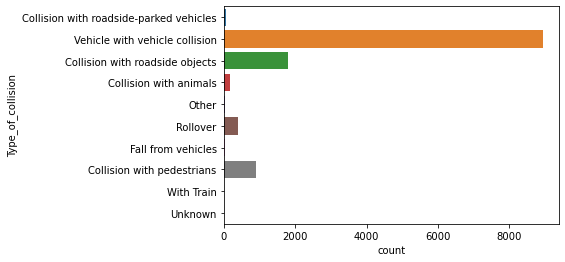

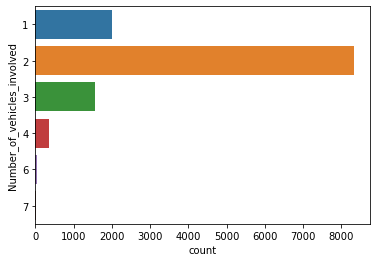

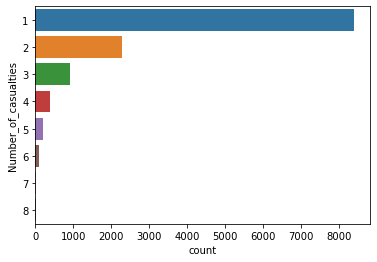

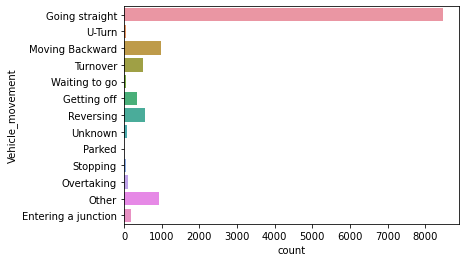

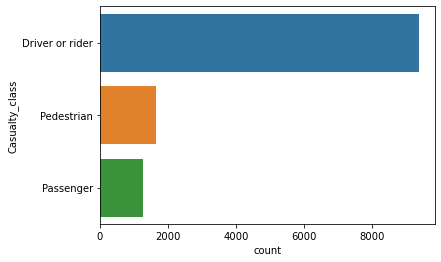

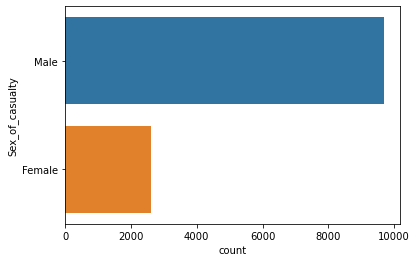

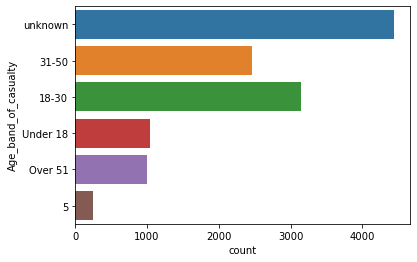

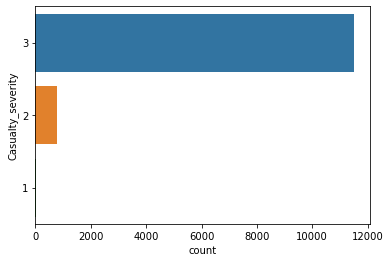

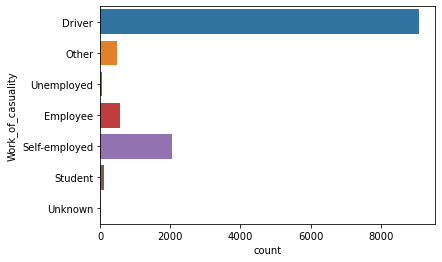

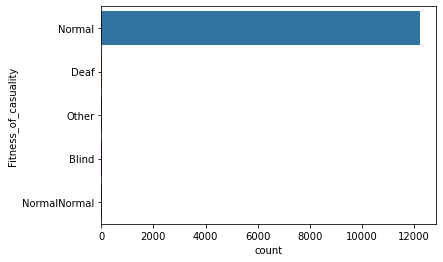

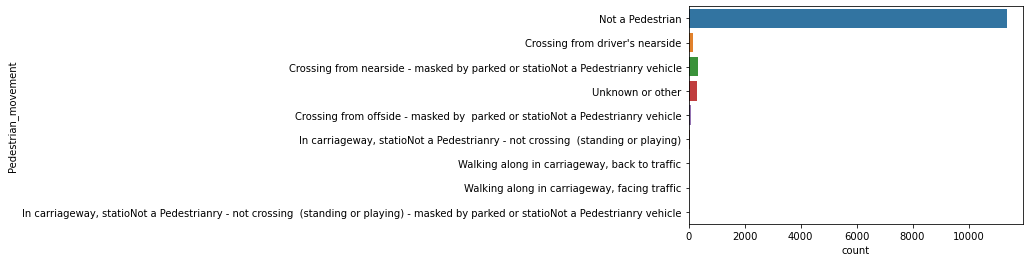

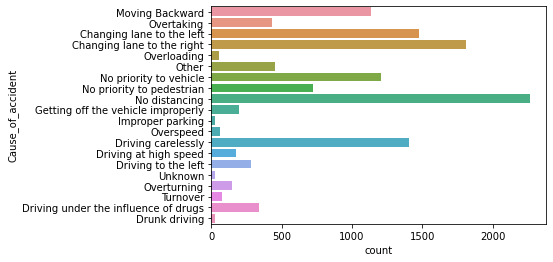

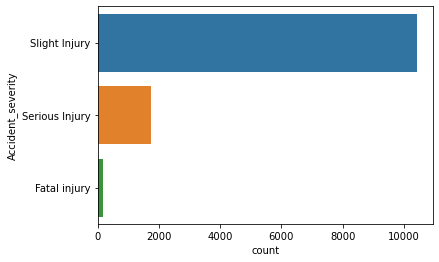

In [19]:
cols = ["Day_of_week",               
"Age_band_of_driver",          
"Sex_of_driver",              
"Educational_level",            
"Vehicle_driver_relation",      
"Driving_experience",          
"Type_of_vehicle",            
"Owner_of_vehicle",           
"Service_year_of_vehicle",     
"Defect_of_vehicle",            
"Area_accident_occured",      
"Lanes_or_Medians",         
"Road_allignment",             
"Types_of_Junction",         
"Road_surface_type",           
"Road_surface_conditions",     
"Light_conditions",            
"Weather_conditions",          
"Type_of_collision",          
"Number_of_vehicles_involved",  
"Number_of_casualties",        
"Vehicle_movement",            
"Casualty_class",             
"Sex_of_casualty",            
"Age_band_of_casualty",       
"Casualty_severity",           
"Work_of_casuality",            
"Fitness_of_casuality",         
"Pedestrian_movement",          
"Cause_of_accident",           
"Accident_severity"
]

for col in cols:
    p=sns.countplot(y=data[col])
    plt.show()

# Feature Transformation

In [20]:
data["Time"]=pd.to_datetime(data["Time"])

C:\Users\Admin\AppData\Local\Temp/ipykernel_26580/3993601446.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Time"]=pd.to_datetime(data["Time"])


In [21]:
data["Hour"]= data["Time"].dt.hour
data["Minutes"]=data["Time"].dt.minute

In [22]:
data.drop("Time",axis=1,inplace=True)

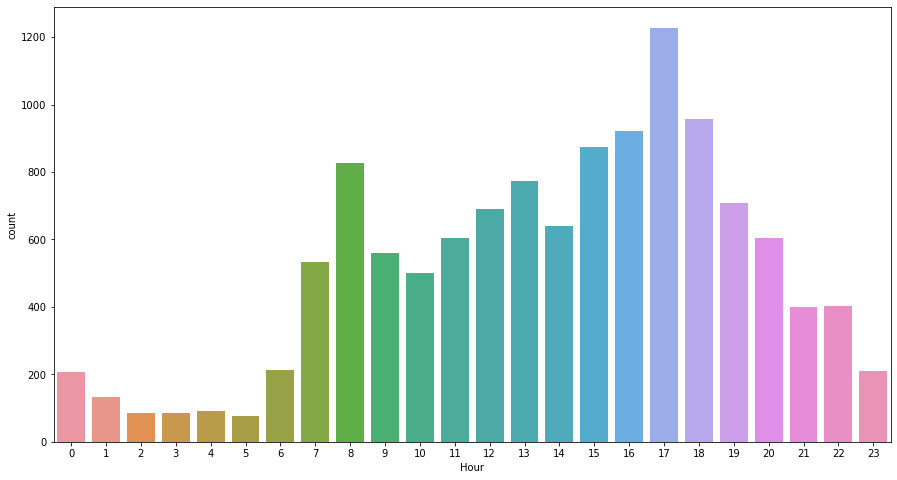

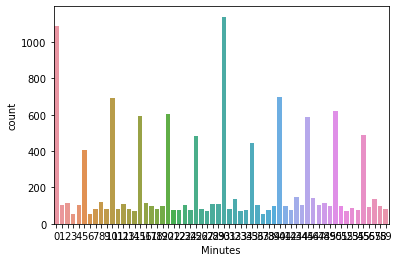

In [23]:
plt.figure(figsize=(15,8))
cols=["Hour","Minutes"]
for col in cols:
    sns.countplot(x=data[col])
    plt.show()

In [24]:
# DATA PRE-PROCESSING
# One Hot Encoding
data = pd.get_dummies (data=data, columns=["Sex_of_driver","Casualty_class","Sex_of_casualty"], prefix=["Gender_Driver","Casualty CLass","Gender_Casualty"])

In [25]:
data.drop(columns = ["Defect_of_vehicle","Vehicle_driver_relation","Work_of_casuality","Fitness_of_casuality"], inplace=True)

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
cols = ["Day_of_week","Owner_of_vehicle","Area_accident_occured",
        "Lanes_or_Medians","Road_allignment","Types_of_Junction","Road_surface_type","Type_of_collision","Vehicle_movement",            
"Pedestrian_movement","Cause_of_accident","Type_of_vehicle","Weather_conditions","Road_surface_conditions","Educational_level"
]
label_encoder=LabelEncoder()
for col in cols:
    encoded_data=label_encoder.fit_transform(data[col])
    data[f"Encoded_{col}"] = encoded_data
    data.drop(f"{col}",axis=1,inplace=True)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Age_band_of_driver               12316 non-null  object
 1   Driving_experience               12316 non-null  object
 2   Service_year_of_vehicle          12316 non-null  object
 3   Light_conditions                 12316 non-null  object
 4   Number_of_vehicles_involved      12316 non-null  int64 
 5   Number_of_casualties             12316 non-null  int64 
 6   Age_band_of_casualty             12316 non-null  object
 7   Casualty_severity                12316 non-null  object
 8   Accident_severity                12316 non-null  object
 9   Hour                             12316 non-null  int32 
 10  Minutes                          12316 non-null  int32 
 11  Gender_Driver_Female             12316 non-null  bool  
 12  Gender_Driver_Male              

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Age_band_of_driver               12316 non-null  object
 1   Driving_experience               12316 non-null  object
 2   Service_year_of_vehicle          12316 non-null  object
 3   Light_conditions                 12316 non-null  object
 4   Number_of_vehicles_involved      12316 non-null  int64 
 5   Number_of_casualties             12316 non-null  int64 
 6   Age_band_of_casualty             12316 non-null  object
 7   Casualty_severity                12316 non-null  object
 8   Accident_severity                12316 non-null  object
 9   Hour                             12316 non-null  int32 
 10  Minutes                          12316 non-null  int32 
 11  Gender_Driver_Female             12316 non-null  bool  
 12  Gender_Driver_Male              

In [30]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder=OrdinalEncoder()

Casualty_severity_order = ["1","2","3","unknown"]
Age_band_of_casualty_order=["5","Under 18","18-30","31-50","Over 51","unknown"]
Light_conditions_order = ["Daylight","Darkness - lights lit", "Darkness - lights unlit","Darkness - no lighting"]
Service_year_of_vehicle_order = ["Below 1yr","1-2yr","2-5yrs","5-10yrs","Above 10yr","Unknown"]
Driving_experience_order=["No Licence","Below 1yr","1-2yr","2-5yr","5-10yr","Above 10yr","unknown"]
Age_band_of_driver_order=["Under 18","18-30","31-50","Over 51","Unknown"]



Casualty_severity_encoder=OrdinalEncoder(categories=[Casualty_severity_order])
Casualty_severity_encoded=Casualty_severity_encoder.fit_transform(data[["Casualty_severity"]])
data["Casualty_severity_encoded"]=Casualty_severity_encoded

Age_band_of_casualty_encoder=OrdinalEncoder(categories=[Age_band_of_casualty_order])
Age_band_of_casualty_encoded=Age_band_of_casualty_encoder.fit_transform(data[["Age_band_of_casualty"]])
data["Age_band_of_casualty_encoded"]=Age_band_of_casualty_encoded

Light_conditions_encoder=OrdinalEncoder(categories=[Light_conditions_order])
Light_conditions_encoded=Light_conditions_encoder.fit_transform(data[["Light_conditions"]])
data["Light_conditions_encoded"]=Light_conditions_encoded

Service_year_of_vehicle_encoder=OrdinalEncoder(categories=[Service_year_of_vehicle_order])
Service_year_of_vehicle_encoded=Service_year_of_vehicle_encoder.fit_transform(data[["Service_year_of_vehicle"]])
data["Service_year_of_vehicle_encoded"]=Service_year_of_vehicle_encoded


Driving_experience_encoder=OrdinalEncoder(categories=[Driving_experience_order])
Driving_experience_encoded=Driving_experience_encoder.fit_transform(data[["Driving_experience"]])
data["Driving_experience_encoded"]=Driving_experience_encoded


Age_band_of_driver_encoder=OrdinalEncoder(categories=[Age_band_of_driver_order])
Age_band_of_driver_encoded=Age_band_of_driver_encoder.fit_transform(data[["Age_band_of_driver"]])
data["Age_band_of_driver_encoded"]=Age_band_of_driver_encoded



cols = ["Casualty_severity","Age_band_of_casualty","Light_conditions","Service_year_of_vehicle","Driving_experience","Age_band_of_driver"]
for col in cols:
    data.drop(f"{col}",axis=1,inplace=True)
    


In [31]:
#COnverting the float values of ordinal encoded column to int
cols = ["Casualty_severity_encoded","Age_band_of_casualty_encoded","Light_conditions_encoded","Service_year_of_vehicle_encoded","Driving_experience_encoded","Age_band_of_driver_encoded"]
for col in cols:
    data[col]=data[col].astype(int)


In [32]:
# Class Imbalance Problem:
# sns.countplot(x=data["Encoded_Accident_severity"])

In [33]:
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(random_state=42)
X=data.drop("Accident_severity",axis=1)
target=data["Accident_severity"]
X_resample,y_resample=rus.fit_resample(X,target)


<AxesSubplot:xlabel='Accident_severity', ylabel='count'>

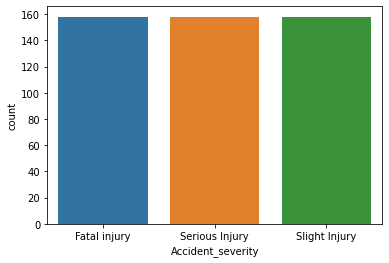

In [34]:
sns.countplot(x=y_resample)

In [35]:
# Model Building
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X_resample,y_resample, test_size=0.3,random_state=42)

In [36]:
def ordinal_encoder(df, feats): 
    for feat in feats:    
        feat_val = list(np.arange(df[feat].nunique()))
        feat_key = list(df[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        df[feat] = df[feat].map(feat_dict)
    return df


In [37]:
y_test = ordinal_encoder(pd.DataFrame(y_test, columns = ['Accident_severity']), pd.DataFrame(y_test, columns = ['Accident_severity']).columns)['Accident_severity']
y_train = ordinal_encoder(pd.DataFrame(y_train, columns = ['Accident_severity']), pd.DataFrame(y_train, columns = ['Accident_severity']).columns)['Accident_severity']

In [38]:
# 1. Logistic Regression - Thrws error since we haven't encoded the target col.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
logistic_model = LogisticRegression(max_iter=10)
logistic_model.fit(X_train,y_train) 
y_log_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_log_pred)
report = classification_report(y_test, y_log_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)



Accuracy: 0.3776223776223776
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.40      0.44        58
           1       0.27      0.37      0.31        38
           2       0.38      0.36      0.37        47

    accuracy                           0.38       143
   macro avg       0.38      0.38      0.37       143
weighted avg       0.40      0.38      0.38       143



c:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
# 2. Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train,y_train)
y_dtc_pred=dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_dtc_pred)
report = classification_report(y_test, y_dtc_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.5244755244755245
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.62      0.63        58
           1       0.35      0.45      0.40        38
           2       0.58      0.47      0.52        47

    accuracy                           0.52       143
   macro avg       0.52      0.51      0.51       143
weighted avg       0.54      0.52      0.53       143



In [40]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the model on the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
y_rfc_pred = rfc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_rfc_pred)
report = classification_report(y_test, y_rfc_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.5034965034965035
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.64      0.67        58
           1       0.31      0.32      0.31        38
           2       0.45      0.49      0.47        47

    accuracy                           0.50       143
   macro avg       0.49      0.48      0.48       143
weighted avg       0.51      0.50      0.51       143



In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

naive_bayes_classifier = GaussianNB()

# Train the classifier on the training data
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = naive_bayes_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display a classification report with precision, recall, and F1-score
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.34
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.16      0.25        58
           1       0.00      0.00      0.00        38
           2       0.33      0.85      0.48        47

    accuracy                           0.34       143
   macro avg       0.34      0.34      0.24       143
weighted avg       0.39      0.34      0.26       143



In [52]:
from sklearn.svm import LinearSVC
svm_model = SVC()


In [51]:
# Train the classifier on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display a classification report with precision, recall, and F1-score
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.28
Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.05      0.09        58
           1       0.21      0.39      0.27        38
           2       0.37      0.47      0.41        47

    accuracy                           0.28       143
   macro avg       0.28      0.30      0.26       143
weighted avg       0.29      0.28      0.24       143

